In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from datetime import datetime
import plotly.express as px

In [3]:
daily_tweets_dir = '/home/praneet/Projects/financial-markets-analysis-2020/dataset/covid19_twitter/dailies'

In [13]:
all_dates = []
n_tweets = []

In [14]:
for files in os.listdir(daily_tweets_dir):
    file_dir = os.path.join(daily_tweets_dir, files)
    if files == 'README.md':
        continue
    for file in os.listdir(file_dir):
        
        if file.endswith("_clean-dataset.tsv.gz"):
            filename = os.path.join(file_dir, file)
            data = pd.read_csv(filename, sep='\t',lineterminator='\n', usecols = [0], names=['tweet_id'] ,low_memory=False)
            data = data.dropna()
            data = data.replace(to_replace='None', value=np.nan).dropna()
            all_dates.append(files) 
            n_tweets.append(len(list(data['tweet_id'])[1:]))

In [28]:
tweets_frequency = pd.DataFrame(list(zip(all_dates, n_tweets)), columns=['Date', 'Tweets'])
tweets_frequency.head()

,Date,Tweets
0,2020-05-18,941620
1,2020-04-05,934438
2,2020-04-22,1125997
3,2020-06-15,794379
4,2020-05-21,1027105


In [29]:
tweets_frequency['Date'] = pd.to_datetime(tweets_frequency.Date)
tweets_frequency = tweets_frequency.sort_values(by='Date')
tweets_frequency.head()

,Date,Tweets
44,2020-03-22,779692
74,2020-03-23,846968
23,2020-03-24,877990
34,2020-03-25,862117
50,2020-03-26,905689


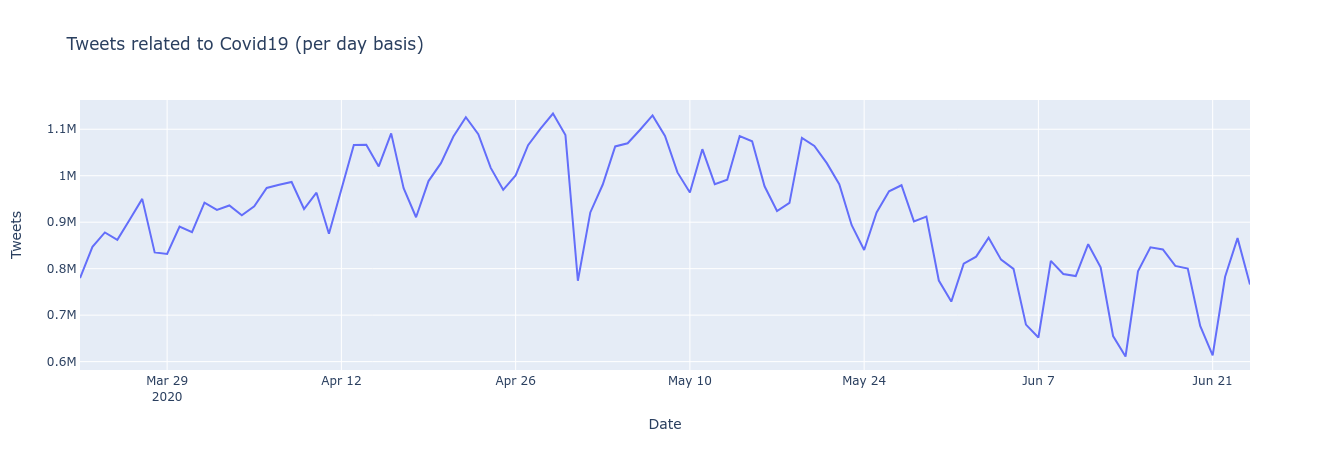

In [70]:
fig = px.line(x='Date', y='Tweets', data_frame=tweets_frequency, title="Tweets related to Covid19 (per day basis)")
fig.show()